In [65]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/owid-covid-data.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

**2. Nhóm câu hỏi về mô tả thống kê cơ bản dữ liệu**

Với mỗi quốc gia thuộc về nhóm cần tính số liệu thống kê lần lượt cho nhiễm và tử vong do coronavirus được báo cáo mới.

Chỉ cần thực hiện với 3 quốc gia: **Brazil, Chile, Venezuela**

**(1) Tính giá trị nhỏ nhất, lớn nhất**

In [17]:
selected_countries = ["BRA", "CHL", "VEN"]
filtered_df = df[df["iso_code"].isin(selected_countries).dropna()]

stats_selected_df = filtered_df.groupby("iso_code").agg(
    new_cases_min=("new_cases", "min"),
    new_cases_max=("new_cases", "max"),
    new_deaths_min=("new_deaths", "min"),
    new_deaths_max=("new_deaths", "max")
).reset_index()

stats_selected_df

,iso_code,new_cases_min,new_cases_max,new_deaths_min,new_deaths_max
0,BRA,-19796.0,287149.0,0.0,4148.0
1,CHL,0.0,41651.0,-213.0,1057.0
2,VEN,0.0,4418.0,-6.0,35.0


**(2) Tính tứ phân vị thứ nhất(Q1), thứ hai(Q2), thứ ba(Q3)** 

In [34]:
quantile_selected_df = filtered_df.groupby("iso_code").agg(
    new_cases_Q1=("new_cases", lambda x: x.quantile(0.25)),
    new_cases_Q2=("new_cases", lambda x: x.quantile(0.50)), 
    new_cases_Q3=("new_cases", lambda x: x.quantile(0.75)),
    new_deaths_Q1=("new_deaths", lambda x: x.quantile(0.25)),
    new_deaths_Q2=("new_deaths", lambda x: x.quantile(0.50)),
    new_deaths_Q3=("new_deaths", lambda x: x.quantile(0.75))
).reset_index()

quantile_selected_df


,iso_code,new_cases_Q1,new_cases_Q2,new_cases_Q3,new_deaths_Q1,new_deaths_Q2,new_deaths_Q3
0,BRA,13268.75,31282.5,53992.75,351.00,735.0,1194.00
1,CHL,1179.75,1997.5,4315.25,19.75,42.0,83.25
2,VEN,245.00,590.0,1100.25,3.00,6.0,12.00


**(3) Tính giá trị trung bình (mean)** 

In [44]:
mean_selected_df = filtered_df.groupby("iso_code").agg(
    new_cases_mean=("new_cases", "mean"),
    new_deaths_mean=("new_deaths", "mean"), 
)
mean_selected_df.round(4)

,new_cases_mean,new_deaths_mean
iso_code,,
BRA,38746.5318,913.7518
CHL,3872.5907,58.8514
VEN,721.1201,8.0604


**(4) Tính độ lệch chuẩn (std-standard deviation)**

In [45]:
sdt_selected_df = filtered_df.groupby("iso_code").agg(
    new_cases_std=("new_cases", "std"),
    new_deaths_std=("new_deaths", "std"), 
)
sdt_selected_df.round(4)

,new_cases_std,new_deaths_std
iso_code,,
BRA,37070.2348,767.5984
CHL,6093.3562,68.0270
VEN,631.3701,7.2182


**(5) Đếm xem có bao nhiêu outliers, một quan sát mà giá trị của nó nằm trong khoảng sau:**

**IQR = Q3 - Q1**

**outliers < Q1 - 1,5*IQR** hoặc **outliers > Q3 + 1,5*IQR**

In [ ]:
def calculate_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    outliers = ((group < lower_bound) | (group > upper_bound)).sum()
    return outliers

outliers_cases = filtered_df.groupby("iso_code")['new_cases'].apply(calculate_outliers).reset_index(name='new_cases_outliers')
outliers_deaths = filtered_df.groupby("iso_code")['new_deaths'].apply(calculate_outliers).reset_index(name='new_deaths_outliers')

outliers_df = pd.merge(outliers_cases, outliers_deaths, on='iso_code')

outliers_df


,iso_code,new_cases_outliers,new_deaths_outliers
0,BRA,26,42
1,CHL,38,29
2,VEN,15,21


**(6) Lập bảng mô tả sô liệu thống kê cho từng 3 đất nước đó**

**Bảng mô tả dữ liệu thống kê cho new_cases**

In [61]:
overall_selected_cases_df = filtered_df.groupby("iso_code").agg(
    new_cases_min = ("new_cases", "min"),
    new_cases_Q1=("new_cases", lambda x: x.quantile(0.25)),
    new_cases_Q2=("new_cases", lambda x: x.quantile(0.50)), 
    new_cases_Q3=("new_cases", lambda x: x.quantile(0.75)),
    new_cases_max = ("new_cases", "max"),
    new_cases_avg=("new_cases", "mean"),
    new_cases_std = ("new_cases", "std"),
).reset_index()

overall_selected_cases_df = pd.merge(overall_selected_df, outliers_cases)
overall_selected_cases_df


,iso_code,new_cases_min,new_cases_Q1,new_cases_Q2,new_cases_Q3,new_cases_max,new_cases_avg,new_cases_std,new_cases_outliers
0,BRA,-19796.0,13268.75,31282.5,53992.75,287149.0,38746.531768,37070.234763,26
1,CHL,0.0,1179.75,1997.5,4315.25,41651.0,3872.590659,6093.356189,38
2,VEN,0.0,245.00,590.0,1100.25,4418.0,721.120056,631.370117,15


**Bảng mô tả dữ liệu thống kê cho new_deaths**

In [62]:
overall_selected_deaths_df = filtered_df.groupby("iso_code").agg(
    new_deaths_min = ("new_deaths", "min"),
    new_deaths_Q1=("new_deaths", lambda x: x.quantile(0.25)),
    new_deaths_Q2=("new_deaths", lambda x: x.quantile(0.50)), 
    new_deaths_Q3=("new_deaths", lambda x: x.quantile(0.75)),
    new_deaths_max = ("new_deaths", "max"),
    new_deaths_avg=("new_deaths", "mean"),
    new_deaths_std = ("new_deaths", "std"),
).reset_index()

overall_selected_deaths_df = pd.merge(overall_selected_deaths_df, outliers_deaths)
overall_selected_deaths_df


,iso_code,new_deaths_min,new_deaths_Q1,new_deaths_Q2,new_deaths_Q3,new_deaths_max,new_deaths_avg,new_deaths_std,new_deaths_outliers
0,BRA,0.0,351.00,735.0,1194.00,4148.0,913.751773,767.598420,42
1,CHL,-213.0,19.75,42.0,83.25,1057.0,58.851429,68.026993,29
2,VEN,-6.0,3.00,6.0,12.00,35.0,8.060432,7.218239,21


**(7) Vẽ biểu đồ boxplot hay còn gọi là box-and-whisker cho nhiễm coronavirus**

In [68]:
df_BRA = filtered_df[filtered_df['iso_code'] == 'BRA']
df_CHL = filtered_df[filtered_df['iso_code'] == 'CHL']
df_VEN = filtered_df[filtered_df['iso_code'] == 'VEN']

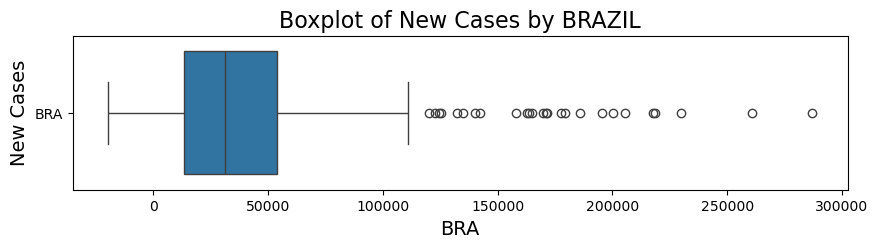

In [74]:
plt.figure(figsize=(10, 2))

sns.boxplot(x="new_cases", y="iso_code", data=df_BRA)

plt.title("Boxplot of New Cases by BRAZIL", fontsize=16)
plt.xlabel("BRA", fontsize=14)
plt.ylabel("New Cases", fontsize=14)

plt.show()

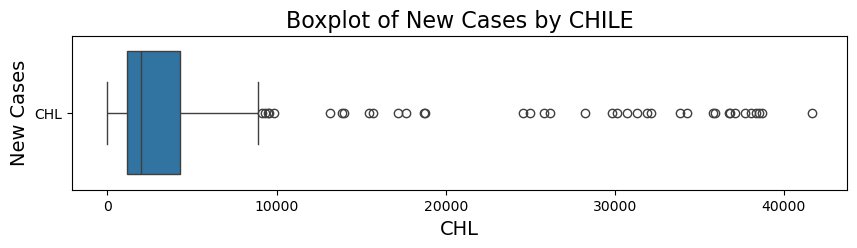

In [75]:
plt.figure(figsize=(10, 2))

sns.boxplot(x="new_cases", y="iso_code", data=df_CHL)

plt.title("Boxplot of New Cases by CHILE", fontsize=16)
plt.xlabel("CHL", fontsize=14)
plt.ylabel("New Cases", fontsize=14)

plt.show()

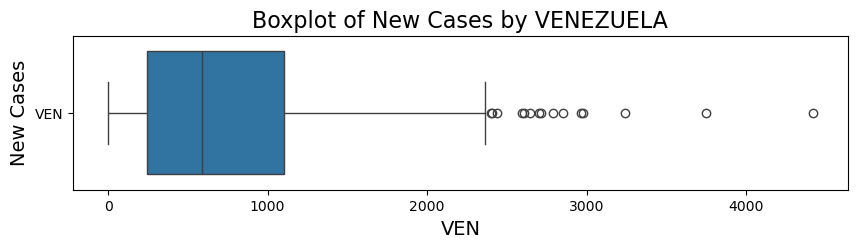

In [77]:
plt.figure(figsize=(10, 2))

sns.boxplot(x="new_cases", y="iso_code", data=df_VEN)

plt.title("Boxplot of New Cases by VENEZUELA", fontsize=16)
plt.xlabel("VEN", fontsize=14)
plt.ylabel("New Cases", fontsize=14)

plt.show()